# Introduction to Machine Learning <font color='blue'> (35 min) </font>

# Google doc with code corrections is accessible at:
### https://docs.google.com/document/d/1phmpGjNJbHwxP7448taFqREw6Vw3qVSUEDhu1KcLxog/edit?usp=sharing

# 0) Importing the right tools <font color='blue'> (5 min) </font>

### <font color='red'>0.1) Import the necessary packages with their usual aliases: </font>

- pandas as pd
- numpy as np
- seaborn as sns
- matplotlib.pyplot as plt

In [3]:
from __future__ import division

#### IMPORT THE USUAL PACKAGES WITH THEIR ALIASES ####

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### <font color='red'>0.2) Import the dataset from <i>'../data/data_after_feature_engineering.csv'</i></font>

In [4]:
raw_data = pd.read_csv('./my_data_after_feature_engineering.csv')

### <font color='red'>0.3) Copy the raw_data and print samples</font>

In [5]:
data = raw_data.copy()

In [6]:
data.sample(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,total_docks_start,total_docks_end,start_day,is_weekend,start_moment,is_rainy,is_circle_trip,june_day,traveled_distance,average_speed
168864,643,2015-06-07 15:57:00,2015-06-07 16:08:00,495,W 47 St & 10 Ave,40.762699,-73.993012,267,Broadway & W 36 St,40.750977,...,25.0,57.0,Sunday,True,afternoon,False,False,7,1.379312,7.722433
415989,1092,2015-06-14 19:28:00,2015-06-14 19:46:00,317,E 6 St & Avenue B,40.724537,-73.981854,360,William St & Pine St,40.707179,...,27.0,39.0,Sunday,True,evening,False,False,14,2.985103,9.840998
854914,367,2015-06-28 19:14:00,2015-06-28 19:20:00,238,Bank St & Washington St,40.736197,-74.008592,127,Barrow St & Hudson St,40.731724,...,31.0,31.0,Sunday,True,evening,False,False,28,0.521109,5.111701
529798,565,2015-06-18 14:05:00,2015-06-18 14:15:00,423,W 54 St & 9 Ave,40.765849,-73.986905,523,W 38 St & 8 Ave,40.754666,...,31.0,51.0,Thursday,False,afternoon,False,False,18,1.299447,8.279662
174838,333,2015-06-07 18:13:00,2015-06-07 18:19:00,174,E 25 St & 1 Ave,40.738177,-73.977387,537,Lexington Ave & E 24 St,40.740259,...,30.0,39.0,Sunday,True,afternoon,False,False,7,0.610553,6.600577


# Predictive modeling

## 1) Variable encoding <font color='blue'> (10 min) </font>

Categorical variables need to be converted to numbers so as to train machine learning algorithms. There are different kinds of variables encoding, such as dummy-encoding: this method consists in building $n$ binary columns when a variable can take $n$ values. When regression is used, features need not be correlated, hence $n-1$ binary columns will be created.

### <font color='red'>1.1) Understand how the <i>pd.get_dummies(data.column_name_here)</i> function allows to create dummy variables</font>

In [12]:
set(data.june_day)

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30}

In [19]:
#### TRY HERE TO DUMMY-ENCODE WEATHER CONDITIONS OF THE DATASET, USING pd.get_dummies(data.Conditions) ####
pd.get_dummies(data['Conditions'])

,Clear,Haze,Heavy Rain,Light Rain,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Scattered Clouds
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,1,0,0,0


### <font color='red'>1.2) Print the names of the columns of the dataset using <i>data.columns</i>. Which ones should be dummified ?</font>

In [18]:
data.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'Precipitationmm',
       u'Conditions', u'TemperatureC', u'total_docks_start',
       u'total_docks_end', u'start_day', u'is_weekend', u'start_moment',
       u'is_rainy', u'is_circle_trip', u'june_day', u'traveled_distance',
       u'average_speed'],
      dtype='object')

### <font color='red'>1.3) Fill in the following loop so you append to the existing DataFrame the newly created dummy columns</font>

In [20]:
for variable_name in ['Conditions','start_day','is_weekend',
                      'start_moment','is_rainy','is_circle_trip']:
    print 'Dummifying the {} variable ...'.format(variable_name)
    
    dummies = pd.get_dummies(data[variable_name])
    
    dummies.columns = ['{}_{}'.format(variable_name,x) for x in dummies.columns]  # this will rename the column
                                                                                  # in an appropriate way
        
    data = pd.concat([data,dummies],axis=1)  # This will append the dummy column to the existing dataframe

Dummifying the Conditions variable ...
Dummifying the start_day variable ...
Dummifying the is_weekend variable ...
Dummifying the start_moment variable ...
Dummifying the is_rainy variable ...
Dummifying the is_circle_trip variable ...


### <font color='red'>1.4) Once you are sure that the dummy columns have been created (check by printing samples), delete the old columns</font>

In [23]:
#### CHECK THAT DUMMIFICATION IS SUCCESSFUL BY PRINTING SAMPLES AND COLUMNS NAMES ####
data.sample(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,is_weekend_False,is_weekend_True,start_moment_afternoon,start_moment_evening,start_moment_morning,start_moment_night,is_rainy_False,is_rainy_True,is_circle_trip_False,is_circle_trip_True
284091,736,2015-06-10 19:44:00,2015-06-10 19:56:00,483,E 12 St & 3 Ave,40.732233,-73.988900,511,E 14 St & Avenue B,40.729387,...,1,0,0,1,0,0,1,0,1,0
129378,1749,2015-06-06 11:03:00,2015-06-06 11:32:00,321,Cadman Plaza E & Red Cross Pl,40.699918,-73.989718,387,Centre St & Chambers St,40.712733,...,0,1,0,0,1,0,1,0,1,0
75548,480,2015-06-04 13:50:00,2015-06-04 13:58:00,263,Elizabeth St & Hester St,40.717290,-73.996375,329,Greenwich St & N Moore St,40.720434,...,1,0,1,0,0,0,1,0,1,0


In [24]:
for variable_name in ['Conditions','start_day','is_weekend',
                      'start_moment','is_rainy','is_circle_trip']:
    print 'Deleting the {} variable ...'.format(variable_name)
    data.drop(variable_name, axis=1, inplace=True)

Deleting the Conditions variable ...
Deleting the start_day variable ...
Deleting the is_weekend variable ...
Deleting the start_moment variable ...
Deleting the is_rainy variable ...
Deleting the is_circle_trip variable ...


## 2) Correlation matrix <font color='blue'> (10 min) </font>

### <font color='red'>2.1) Using the <i>.corr()</i> method on <i>data</i>, print samples of the Pearson correlations between features within the dataset</font>

In [27]:
corr = data.corr()

In [30]:
#### PRINT SAMPLES OF THE CORRELATIONS HERE ####
corr.sample(5)

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,...,is_weekend_False,is_weekend_True,start_moment_afternoon,start_moment_evening,start_moment_morning,start_moment_night,is_rainy_False,is_rainy_True,is_circle_trip_False,is_circle_trip_True
Conditions_Haze,-0.011015,-0.000189,0.008798,0.008469,0.001968,0.013202,-0.002557,-0.005471,-0.022058,0.012089,...,0.122638,-0.122638,0.039198,-0.071799,0.043483,-0.062226,0.016986,-0.016986,0.003054,-0.003054
end station id,0.075309,0.068910,0.056839,0.000462,1.000000,0.071791,0.035038,0.000810,-0.003005,-0.041651,...,-0.007235,0.007235,0.006215,-0.009527,0.003154,-0.004654,0.000665,-0.000665,-0.062659,0.062659
start_day_Tuesday,-0.039011,-0.004242,0.018504,0.011686,-0.003218,0.017259,0.008886,-0.001085,-0.013927,0.029990,...,0.226178,-0.226178,-0.036905,0.005293,0.040808,-0.015382,-0.098925,0.098925,0.011704,-0.011704
start_day_Friday,-0.008142,-0.000799,0.007774,-0.000587,-0.001883,0.008116,-0.002864,-0.002820,-0.007585,0.010475,...,0.219342,-0.219342,0.008660,-0.021065,0.005978,0.004182,0.024960,-0.024960,0.008520,-0.008520
start_moment_morning,-0.054384,0.004881,0.011183,0.057614,0.003154,0.037519,-0.015920,-0.000970,-0.053051,0.060912,...,0.079119,-0.079119,-0.637687,-0.336920,1.000000,-0.158316,0.032355,-0.032355,0.018151,-0.018151


### <font color='red'>2.2) Using the <i>sns.heatmap()</i> function of seaborn, plot the Pearson correlations between features. You can refer to https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html to add a mask and make the plot look better</font>

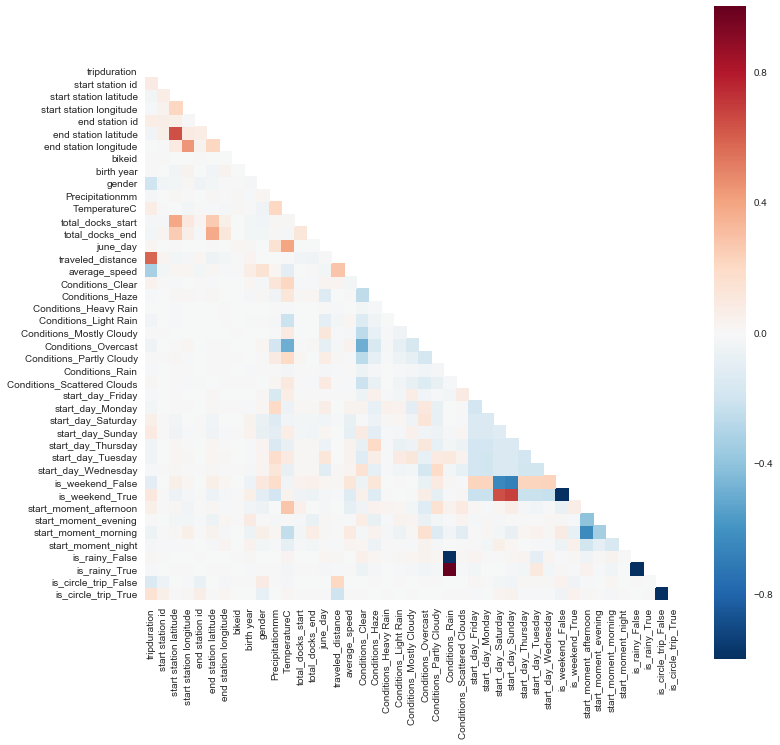

In [33]:
plt.figure(figsize=(12,12))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

## 3) Cross-validation : trying to predict customer vs. subscriber <font color='blue'> (30 min) </font>

### <font color='red'>3.1) Use the <i>seaborn</i> function <i>sns.countplot(data.column_name_here)</i> to countplot the repartition of trips per user type (i.e the <i>usertype</i> column)</font>

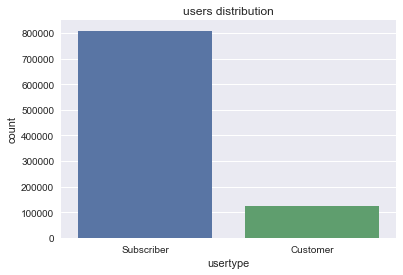

In [35]:
#### COUNTPLOT THE REPARTITION OF TRIPS PER USER TYPE AND ADD A CLEAR TITLE ####

sns.countplot(data.usertype)
plt.title('users distribution')

### <font color='red'> Run the following block, it will delete a few columns for predictive modeling purposes </font>

In [36]:
del data['starttime'], data['stoptime'], data['start station name'], data['end station name']
del data['gender'], data['birth year']
del data['bikeid']
del data['start station id'], data['end station id']

### <font color='red'>3.2) Print the different columns using <i>data.columns</i> </font>

In [37]:
#### PRINT THE COLUMNS OF THE DATASET ####
data.columns

Index([u'tripduration', u'start station latitude', u'start station longitude',
       u'end station latitude', u'end station longitude', u'usertype',
       u'Precipitationmm', u'TemperatureC', u'total_docks_start',
       u'total_docks_end', u'june_day', u'traveled_distance', u'average_speed',
       u'Conditions_Clear', u'Conditions_Haze', u'Conditions_Heavy Rain',
       u'Conditions_Light Rain', u'Conditions_Mostly Cloudy',
       u'Conditions_Overcast', u'Conditions_Partly Cloudy', u'Conditions_Rain',
       u'Conditions_Scattered Clouds', u'start_day_Friday',
       u'start_day_Monday', u'start_day_Saturday', u'start_day_Sunday',
       u'start_day_Thursday', u'start_day_Tuesday', u'start_day_Wednesday',
       u'is_weekend_False', u'is_weekend_True', u'start_moment_afternoon',
       u'start_moment_evening', u'start_moment_morning', u'start_moment_night',
       u'is_rainy_False', u'is_rainy_True', u'is_circle_trip_False',
       u'is_circle_trip_True'],
      dtype='object')

### <font color='red'>3.3) Run the following block. It builds arrays for the features, as well as the labels. Features will be used to predict the labels. Study their structures.</font>

In [38]:
labels = np.array(data.usertype)
del data['usertype']
features = np.array(data)

In [41]:
#### Study the structure of features and labels ####

### <font color='red'>3.4) How many observations/features do we have to make our models ? You can use the <i>.shape</i> attribute of features, and labels</font>

In [43]:
labels.shape,features.shape

((935587,), (935587, 38))

### <font color='red'>3.5) Import the scikit-learn package (called <i>sklearn</i>), that will be used for running machine learning algorithms</font>

In [44]:
#### IMPORT THE SCIKIT-LEARN PACKAGE ####
import sklearn

### <font color='red'>3.6) Binarize the labels of the dataset. You can use the following webpage:</font>
- http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.label_binarize.html

In [61]:
from sklearn.preprocessing import label_binarize
###binarized_labels = #### BINARIZE THE LABELS OF THE DATASET, AND RAVEL THE RESULT USING .ravel() ####
                   #### Subscriber will be label 1, Customer label 0 ####
                   #### This will be a binary classifiation problem ####
binarized_labels = label_binarize(labels, classes=['Subscriber', 'Customer']).ravel()

### <font color='red'>3.7) Show the binarized labels</font>

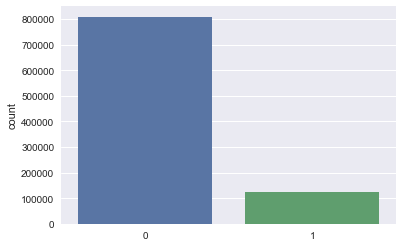

In [62]:
sns.countplot(binarized_labels)

### Split training and testing sets

### <font color='red'>3.8) Split your dataset between a training and testing set (of size 30%). You can use the following webpage:</font>
- http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html

In [63]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                features,binarized_labels, test_size=0.33, random_state=42)

/Users/axa/.pyenv/versions/2.7.12/envs/DS/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### <font color='red'>3.9) Show the results of your split</font>

In [64]:
#### Show samples of X_train, X_test, y_train, y_test ####

X_train

array([[  1.24500000e+03,   4.07111742e+01,  -7.40001654e+01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  1.02500000e+03,   4.07440230e+01,  -7.39760560e+01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  3.75000000e+02,   4.06851443e+01,  -7.39538090e+01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       ..., 
       [  5.07000000e+02,   4.07423543e+01,  -7.39891508e+01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  1.13000000e+03,   4.07267945e+01,  -7.39969509e+01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  3.48000000e+02,   4.07372619e+01,  -7.39923897e+01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00]])

### Random Forest classifier

### <font color='red'>3.10) Go to the following webpages to understand how to compute cross-validation scores of a Random Forest classifier in Python, on the training set:</font>
- http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

### <font color='red'>Run the following block. It will compute a 3-fold cross-validation score using the </font><b>AUC scoring metric</b>,  <font color='red'>as explained in the slides</font>

In [66]:
from sklearn.cross_validation import cross_val_score
cross_val_score(rf, X_train, y_train, scoring='roc_auc')

array([ 0.82760728,  0.82753755,  0.82992899])

### <font color='red'>3.11) Take some time to run as well as understand the following block. 

<b>This does exactly as <i>cross_val_score</i> function from the block above, but it is coded such that you will understand what happens at each iteration, as well as plot the ROC curve for every cross-validation split</b>. You can use the following webpages:</font>
- http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedKFold.html
- http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
- http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

Fold 1
Fold 2
Fold 3


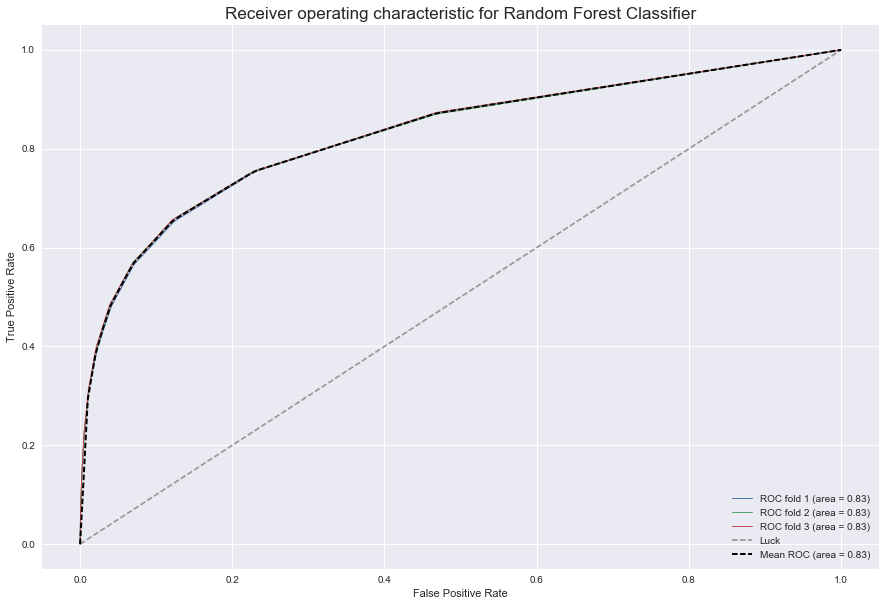

In [67]:
from scipy import interp

from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import StratifiedKFold

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(y_train, n_folds=3)
classifier = RandomForestClassifier()

mean_tpr = 0.
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

plt.figure(figsize=(15,10))
for i, (train, test) in enumerate(cv,1):
    print 'Fold {}'.format(i)
    probas_ = classifier.fit(X_train[train], y_train[train]).predict_proba(X_train[test])
    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y_train[test], probas_[:, 1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Random Forest Classifier',fontsize=17)
plt.legend(loc="lower right")
plt.show()

## 4) Final fit and plots <font color='blue'> (15 min) </font>

### <font color='red'>4.1) Define a random forest classifier, and fit it on the training set. You can return on:</font>
- http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [68]:
rf = RandomForestClassifier()

#### FIT THE RANDOM FOREST CLASSIFIER ON THE TRAINING SET ####
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [69]:
y_pred = rf.predict(X_test)

### <font color='red'>4.2) Show (and if you can, plot!) the features importances using the <i>.feature_importances</i> attribute of your classifier. You can get hints on the following page:</font>
- http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html

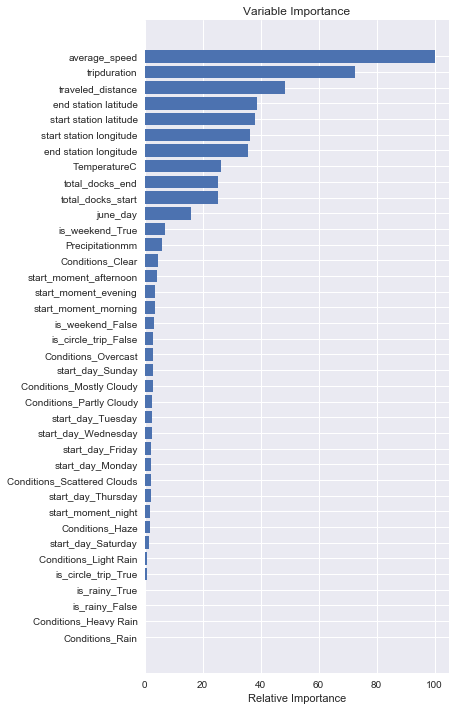

In [77]:
plt.figure(figsize=(12,12))
#### PLOT THE FEATURES IMPORTANCES WITH RESPECT TO THE RANDOM FOREST ####
feature_importance = rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, data.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### <font color='red'>4.3) Run this block to get the final performance on test set, using <i>roc_auc_score</i></font>

In [78]:
from sklearn.metrics import roc_auc_score

y_predict_test = rf.predict_proba(X_test)[:,1]
print 'Final AUC score on test set : {:.2f}'.format(roc_auc_score(y_test, y_predict_test))

Final AUC score on test set : 0.84


### <font color='red'>4.4) Using <i>seaborn.distplot</i>, plot the distribution of trip durations with respect to user type (whether "Subscriber" or "Customer")</font>

In [86]:
data.columns

Index([u'tripduration', u'start station latitude', u'start station longitude',
       u'end station latitude', u'end station longitude', u'Precipitationmm',
       u'TemperatureC', u'total_docks_start', u'total_docks_end', u'june_day',
       u'traveled_distance', u'average_speed', u'Conditions_Clear',
       u'Conditions_Haze', u'Conditions_Heavy Rain', u'Conditions_Light Rain',
       u'Conditions_Mostly Cloudy', u'Conditions_Overcast',
       u'Conditions_Partly Cloudy', u'Conditions_Rain',
       u'Conditions_Scattered Clouds', u'start_day_Friday',
       u'start_day_Monday', u'start_day_Saturday', u'start_day_Sunday',
       u'start_day_Thursday', u'start_day_Tuesday', u'start_day_Wednesday',
       u'is_weekend_False', u'is_weekend_True', u'start_moment_afternoon',
       u'start_moment_evening', u'start_moment_morning', u'start_moment_night',
       u'is_rainy_False', u'is_rainy_True', u'is_circle_trip_False',
       u'is_circle_trip_True'],
      dtype='object')

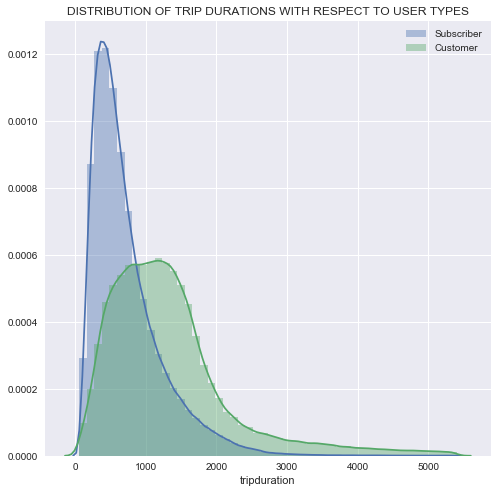

In [93]:
#### PLOT THE DISTRIBUTION OF TRIP DURATIONS WITH RESPECT TO USER TYPES BY USING APPROPRIATE SLICES ON RAW_DATA ####

#### ADD X,Y LABELS, A TITLE, AND A LEGEND TO THIS PLOT ####
plt.figure(figsize=(8,8))
sns.distplot(raw_data[raw_data.usertype=='Subscriber'].tripduration,label='Subscriber')
sns.distplot(raw_data[raw_data.usertype=='Customer'].tripduration,label='Customer')
plt.title('DISTRIBUTION OF TRIP DURATIONS WITH RESPECT TO USER TYPES')
plt.legend()

### <font color='red'>4.5) Using <i>seaborn.distplot</i>, plot the distribution of average speed with respect to user type (whether "Subscriber" or "Customer")</font>

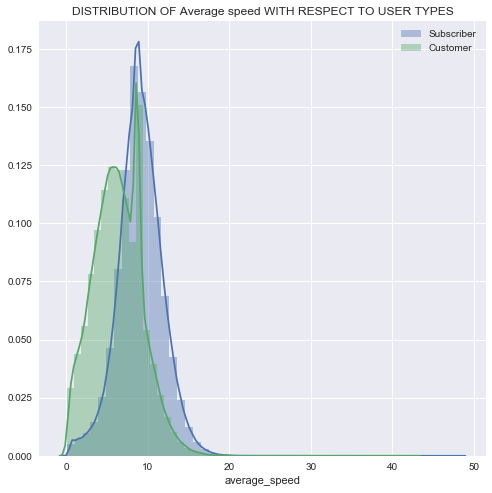

In [95]:
#### PLOT THE DISTRIBUTION OF AVERAGE SPEEDS WITH RESPECT TO USER TYPES BY USING APPROPRIATE SLICES ON RAW_DATA ####


#### ADD X,Y LABELS, A TITLE, AND A LEGEND TO THIS PLOT ####
plt.figure(figsize=(8,8))
sns.distplot(raw_data[raw_data.usertype=='Subscriber'].average_speed,label='Subscriber')
sns.distplot(raw_data[raw_data.usertype=='Customer'].average_speed,label='Customer')
plt.title('DISTRIBUTION OF Average speed WITH RESPECT TO USER TYPES')
plt.legend()

### <font color='red'>4.6) Run the following block to understand how fine-tuning parameters can help improve the performance of your models. Warning : this will take some time to run !</font>

In [96]:
rf = RandomForestClassifier(max_depth=20,max_features=10,n_estimators=50)
cross_val_score(rf, X_train, y_train, scoring='roc_auc')

array([ 0.86277312,  0.86224046,  0.86442416])

# Free exploration/modeling of the dataset, for instance: <font color='blue'> (45 min) </font>
- Try to use other algorithms
- Try to enrich with other data (taxi trips, points of interests in neighborhoods)
- Try to predict other phenomena
- ....

# Please give us your feedback on the hands-on sessions at:
## <center>https://docs.google.com/forms/d/e/1FAIpQLScw_fPB1m6x_sMm59v_VHNBVcvfsMPhoqXwSjSiJQtzlpOJJA/viewform?usp=sf_link</center>